# CAPM BRASIL

In [1]:
from scipy import stats
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

taxa_livre_de_risco = 0.06

### IBOVESPA

In [2]:
ibov = web.DataReader('^BVSP', ds_yahoo, start, end)

### Carteira de Ações

In [3]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'PMAM3.SA',
           'FLRY3.SA', 'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
pmam = web.DataReader(tickers[3], ds_yahoo, start, end)
flry = web.DataReader(tickers[4], ds_yahoo, start, end)
pssa = web.DataReader(tickers[5], ds_yahoo, start, end)
tiet = web.DataReader(tickers[6], ds_yahoo, start, end)
leve = web.DataReader(tickers[7], ds_yahoo, start, end)
whrl = web.DataReader(tickers[8], ds_yahoo, start, end)

### Acumulado

In [4]:
# Mercado
ibov['Acumulado'] = ibov['Adj Close'] / ibov['Adj Close'].iloc[0]

# Carteira
itau['Acumulado'] = itau['Adj Close'] / itau['Adj Close'].iloc[0]
abev['Acumulado'] = abev['Adj Close'] / abev['Adj Close'].iloc[0]
usim['Acumulado'] = usim['Adj Close'] / usim['Adj Close'].iloc[0]
pmam['Acumulado'] = pmam['Adj Close'] / pmam['Adj Close'].iloc[0]
flry['Acumulado'] = flry['Adj Close'] / flry['Adj Close'].iloc[0]
pssa['Acumulado'] = pssa['Adj Close'] / pssa['Adj Close'].iloc[0]
tiet['Acumulado'] = tiet['Adj Close'] / tiet['Adj Close'].iloc[0]
leve['Acumulado'] = leve['Adj Close'] / leve['Adj Close'].iloc[0]
whrl['Acumulado'] = whrl['Adj Close'] / whrl['Adj Close'].iloc[0]

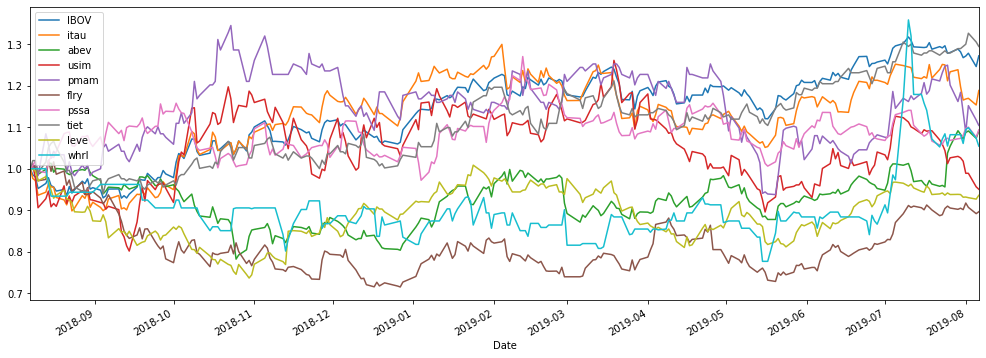

In [5]:
ibov['Acumulado'].plot(label='IBOV', figsize=(17,6))
itau['Acumulado'].plot(label='itau')
abev['Acumulado'].plot(label='abev')
usim['Acumulado'].plot(label='usim')
pmam['Acumulado'].plot(label='pmam')
flry['Acumulado'].plot(label='flry')
pssa['Acumulado'].plot(label='pssa')
tiet['Acumulado'].plot(label='tiet')
leve['Acumulado'].plot(label='leve')
whrl['Acumulado'].plot(label='whrl')
plt.legend();

# Calculando o Retorno Diário de cada ação

In [6]:
# Mercado
ibov['Retorno Diário'] = ibov['Adj Close'].pct_change(1)

# Carteira
itau['Retorno Diário'] = itau['Adj Close'].pct_change(1)
abev['Retorno Diário'] = abev['Adj Close'].pct_change(1)
usim['Retorno Diário'] = usim['Adj Close'].pct_change(1)
pmam['Retorno Diário'] = pmam['Adj Close'].pct_change(1)
flry['Retorno Diário'] = flry['Adj Close'].pct_change(1)
pssa['Retorno Diário'] = pssa['Adj Close'].pct_change(1)
tiet['Retorno Diário'] = tiet['Adj Close'].pct_change(1)
leve['Retorno Diário'] = leve['Adj Close'].pct_change(1)
whrl['Retorno Diário'] = whrl['Adj Close'].pct_change(1)

# Calculando o Retorno Diário de toda a Carteira

### Normalizando o retorno diário de cada ativo do portfólio

In [7]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

### Alocando cada ativo com um peso específico

In [8]:
# Pesos atuais
pesos = [.0964, .0252, .1161, .2293, .0491, .0864, .1373, .2415, .0187]

for acao_df, alocacao in zip((itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

### Posição de cada ativo no portfólio

In [9]:
for acao_df in (itau, abev, usim, pmam, flry, pssa, tiet, leve, whrl):
    acao_df['Posicao'] = acao_df['Alocacao'] * 70000

In [10]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  pmam['Posicao'], flry['Posicao'], pssa['Posicao'],
                  tiet['Posicao'], leve['Posicao'], whrl['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

In [11]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'PMAM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']

In [12]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [13]:
portfolio_posicao['Retorno Diário'] = portfolio_posicao['Total'].pct_change(1)

### Carteira x IBOV

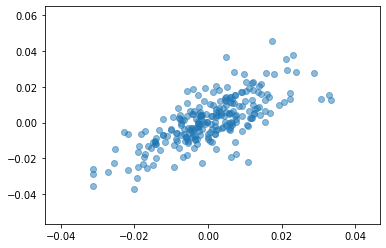

In [14]:
plt.scatter(portfolio_posicao['Retorno Diário'], ibov['Retorno Diário'], alpha=0.5);

In [15]:
beta_p, alpha_p, r_value_p, p_value_p, std_err_p = stats.linregress(portfolio_posicao['Retorno Diário'].iloc[1:],
                                                                    ibov['Retorno Diário'].iloc[1:])

In [16]:
print('beta: {}'.format(beta_p))
print('alpha: {}'.format(alpha_p))

beta: 0.8665822504053353
alpha: 0.0007879940900106333


### Itau x IBOV

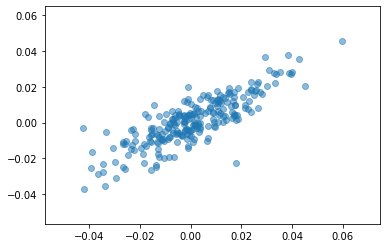

In [17]:
plt.scatter(itau['Retorno Diário'], ibov['Retorno Diário'], alpha=0.5);

In [18]:
beta_i, alpha_i, r_value_i, p_value_i, std_err_i = stats.linregress(itau['Retorno Diário'].iloc[1:],
                                                                    ibov['Retorno Diário'].iloc[1:])

In [19]:
print('beta: {}'.format(beta_i))
print('alpha: {}'.format(alpha_i))

beta: 0.6456607361546178
alpha: 0.0005220294038202128


### Fleury x IBOV

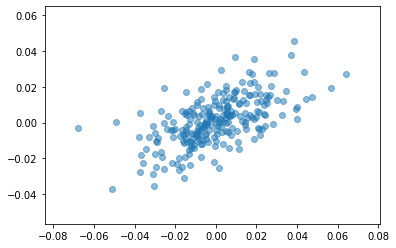

In [20]:
plt.scatter(flry['Retorno Diário'], ibov['Retorno Diário'], alpha=0.5);

In [21]:
beta_f, alpha_f, r_value_f, p_value_f, std_err_f = stats.linregress(flry['Retorno Diário'].iloc[1:],
                                                                    ibov['Retorno Diário'].iloc[1:])

In [22]:
print('beta: {}'.format(beta_f))
print('alpha: {}'.format(alpha_f))

beta: 0.42527563777680305
alpha: 0.0011870650630447308


### Fake Stock x IBOV

In [23]:
fake = ibov['Retorno Diário'].iloc[1:] + 0.002

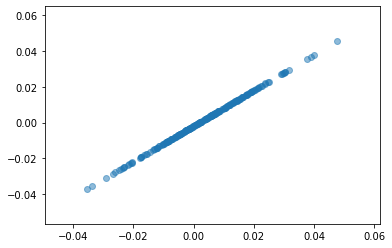

In [24]:
plt.scatter(fake, ibov['Retorno Diário'].iloc[1:], alpha=0.5);

In [25]:
beta_fake, alpha_fake, r_value_fake, p_value_fake, std_err_fake = stats.linregress(fake,
                                                                                   ibov['Retorno Diário'].iloc[1:])

In [26]:
print('beta: {}'.format(beta_fake))
print('alpha: {}'.format(alpha_fake))

beta: 1.0
alpha: -0.002000000000000001
